In [5]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# read data
with open('train.txt', 'r', encoding='utf-8') as file:
    rows = file.readlines()

In [6]:
# text;emotion
texts = []
emotions = []

for row in rows:
    if ';' in row:
        text, emotion = row.strip().split(';', 1)
        texts.append(text)
        emotions.append(emotion)

In [7]:
# emotion assigned positive, negative, neutral
def sentiment(emotion):
    assignments = {
        'joy': 'positive',
        'love': 'positive', 
        'surprise': 'neutral',
        'sadness': 'negative',
        'fear': 'negative', 
        'anger': 'negative'
    }

    # unknown, empty, n/a as neutral
    return assignments.get(emotion, 'neutral')

# Apply assignments to emotions in data
sentiment_in_data = []
for emotion in emotions:
    sentiment_label = sentiment(emotion)
    sentiment_in_data.append(sentiment_label)    

In [9]:
# Create df
df = pd.DataFrame({
    'text': texts,
    'emotion': emotions,
    'sentiment': sentiment_in_data
})

X = df['text']
y = df['sentiment']

X_train = X
y_train = y

In [10]:
# Text to num
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)

In [11]:
# Train
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [12]:
# Sentiment Prediction
def sent_pred(text):
    text_tfidf = vectorizer.transform([text])
    prediction = model.predict(text_tfidf)[0]
    probability = model.predict_proba(text_tfidf)[0]
    
    # Get probabilities for each class
    classes = model.classes_
    prob_dict = {classes[i]: probability[i] for i in range(len(classes))}
    
    return prediction, prob_dict

In [13]:
# read test data
with open('test.txt', 'r', encoding='utf-8') as file:
    rows2 = file.readlines()

In [14]:
# text;emotion
texts2 = []
emotions2 = []

for row2 in rows2:
    if ';' in row2:
        text, emotion = row2.strip().split(';', 1)
        texts2.append(text)
        emotions2.append(emotion)

In [15]:
sentiment_in_data2 = []
for emotion2 in emotions2:
    sentiment_label2 = sentiment(emotion2)
    sentiment_in_data2.append(sentiment_label2)   

In [16]:
# Predictions
predictions = []
probabilities = []

for text2 in texts2:
    pred, probs = sent_pred(text2)
    predictions.append(pred)
    probabilities.append(probs)

In [17]:
# Result
# Show results
print("20 predictions:")
for i in range(min(20, len(texts2))):
    print(f"Text: '{texts2[i][:50]}...'")
    print(f"Actual: {sentiment_in_data2[i]}")
    print(f"Predicted: {predictions[i]}")
    print("--")

20 predictions:
Text: 'im feeling rather rotten so im not very ambitious ...'
Actual: negative
Predicted: negative
--
Text: 'im updating my blog because i feel shitty...'
Actual: negative
Predicted: negative
--
Text: 'i never make her separate from me because i don t ...'
Actual: negative
Predicted: negative
--
Text: 'i left with my bouquet of red and yellow tulips un...'
Actual: positive
Predicted: positive
--
Text: 'i was feeling a little vain when i did this one...'
Actual: negative
Predicted: negative
--
Text: 'i cant walk into a shop anywhere where i do not fe...'
Actual: negative
Predicted: negative
--
Text: 'i felt anger when at the end of a telephone call...'
Actual: negative
Predicted: negative
--
Text: 'i explain why i clung to a relationship with a boy...'
Actual: positive
Predicted: positive
--
Text: 'i like to have the same breathless feeling as a re...'
Actual: positive
Predicted: positive
--
Text: 'i jest i feel grumpy tired and pre menstrual which...'
Actual: negative
P

In [19]:
print("\nClassification Report:")
print(classification_report(sentiment_in_data2, predictions))


Classification Report:
              precision    recall  f1-score   support

    negative       0.91      0.98      0.94      1080
     neutral       1.00      0.17      0.29        66
    positive       0.95      0.93      0.94       854

    accuracy                           0.93      2000
   macro avg       0.95      0.69      0.72      2000
weighted avg       0.93      0.93      0.92      2000



Text(0.5, 23.52222222222222, 'Predicted')

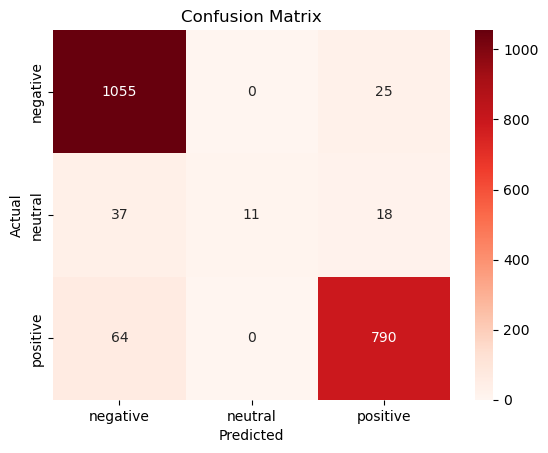

In [20]:
plt.plot()
cm = confusion_matrix(sentiment_in_data2, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', 
            xticklabels=['negative', 'neutral', 'positive'],
            yticklabels=['negative', 'neutral', 'positive'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')